# Полиномиальные преобразования для задачи регрессии 
<font color=darkblue>Попробуем спрогнозировать как зависит цена от мощности двигателя и попытаемся предсказать. 

Задача заключается в приближении полиномом (многочленом одной переменной) искомой функции, описывающей скрытую зависимость.
Многочлен одной переменной имеет вид: <br/>
$ w_0 $ - нулевой степени <br/>
$ w_0+w_1*x $ - первой степени<br/>
$ w_0+w_1*x+w_2*x^2 $ - второй степени<br/>
$...$<br/>
$ w_0+w_1*x+w_2*x^2+...+w_n*x^n  $ - степени **N** <br/>


- зависимость степени полинома 
- деление на обучение и проверку 

## 1. Загрузка данных

In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
pd.set_option('display.float_format', lambda x: "%.2f" % x)
np.set_printoptions(precision=2, suppress=True)


In [16]:
df = pd.read_csv(u'../data/auto.ru_data.csv')
df.head()

,Год выпуска,КПП,Привод,Пробег,Тип кузова,Состояние,Срок владения,Цвет,Руль,Владельцы,...,Модель,Город,Объем двигателя,Мощность двигателя,Двигатель,Цена,Дата,Количество дней,Просмотров всего,Просмотров в день
0,2012.00,механическая,передний,141000.00,внедорожник 5 дв.,Не требует ремонта,NaN,белый,Левый,2 владельца,...,ix35 I,Воронеж,2.00,150.00,Бензин,790000,2018-06-25,60,387.00,6.45
1,2014.00,автоматическая,полный,80189.00,внедорожник 5 дв.,Не требует ремонта,NaN,белый,Левый,3 или более,...,X1 I (E84) Рестайлинг 20d,Москва,2.00,184.00,Дизель,1368000,2018-06-25,60,657.00,10.95
2,2010.00,механическая,передний,143000.00,седан,Не требует ремонта,NaN,бежевый,Левый,3 или более,...,Logan I Рестайлинг,Воронеж,1.40,75.00,Бензин,320000,2018-06-25,60,470.00,7.83
3,2009.00,механическая,передний,126000.00,седан,Не требует ремонта,NaN,жёлтый,Левый,3 или более,...,Nexia I Рестайлинг,Россошь,1.50,80.00,Бензин,150000,2018-06-25,60,438.00,7.30
4,2011.00,механическая,передний,159000.00,хэтчбек 5 дв.,Не требует ремонта,NaN,красный,Левый,3 или более,...,C4 II,Воронеж,1.60,120.00,Бензин,410000,2018-06-25,60,442.00,7.37


<font color=darkblue>Предположим, мы хотим купить новый седан и попытаемся определить какой суммой необходимо обладать для покупки.  

Полпытаемся это сделать по загруженной базе объявлений, для этого выберем данные с типом кузова "седан", и пробегом менее 2000 километров.

In [17]:
dfs = df[(df['Пробег'] < 2000) & (df['Тип кузова']=='седан') & (df['Мощность двигателя']<300) ].reset_index(drop=True)[:70]
dfs = dfs[['Мощность двигателя','Цена']]

<font color=darkblue>Отсортируем данные по мощности двигателя для удобства визуализации 

In [18]:
dfs.sort_values(['Мощность двигателя'],inplace=True)

<font color=darkblue>Отобразим на графике наши данные. 

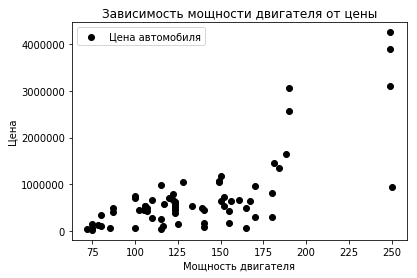

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dfs['Мощность двигателя'], dfs['Цена'], label='Цена автомобиля',color='black')
plt.title("Зависимость мощности двигателя от цены")
plt.xlabel("Мощность двигателя")
plt.ylabel("Цена")
plt.legend(loc='upper left')

<font color=darkblue>применим линейную регрессию LinearRegression и приближение полномом первой степени, воспользуемся алгоритмом LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression
X=np.vstack(dfs["Мощность двигателя"].values)
y=np.vstack(dfs["Цена"].values/1000)  # /1000 или /1000000 чтобы получиться сумму в тысячах рублей или миллионах 
reg = LinearRegression().fit(X,y)

<font color=darkblue>Предскажем значения y_pred для входящих данных X

In [21]:

y_pred=reg.predict(X)

<font color=darkblue>Визуализируем результат 

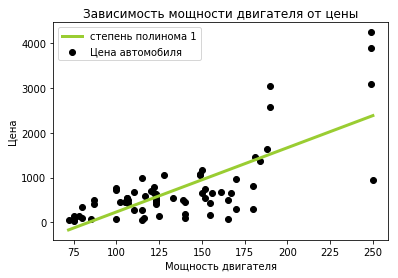

In [22]:
plt.scatter(X, y,color='black', label='Цена автомобиля')
plt.plot(X, y_pred, linewidth=3,color='yellowgreen',label="степень полинома 1"  )
plt.title("Зависимость мощности двигателя от цены")
plt.xlabel("Мощность двигателя")
plt.ylabel("Цена")
plt.legend(loc='upper left')

<font color=darkblue>Видно что нависимость предстказана не достаточно точно, это видно на всем графике, некоторые значения даже ниже нуля. необходимо усложнить модель или добавить количество признаков. но у нас только один признак(мощность двигателя), можно добавить степени этого признака $x^2  x^3$ и т.д. 

Воспользуемся полиномиальным преобразованием признаков(PolynomialFeatures) и оценивать качество будем по метрике $r^2$ (r2_score) 

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

<font color=darkblue>Визуализируем зависимость точности от количества новых признаков

можно динамически менять(двигая ползунок) количество признаков и визуально оценивать качество метрики

In [24]:
from IPython.html.widgets import *


from sklearn import pipeline
def polynom(degree):
    
    model = pipeline.make_pipeline(PolynomialFeatures(degree),LinearRegression()) 
    model.fit(X, y)
    y_pred = model.predict(X) 
    plt.plot(X, y_pred, linewidth=3,color='yellowgreen',label="степень %d " % degree )
    plt.scatter(X, y,  s=50, marker='*',color='black', label="Вся выборка")
    
    print('Метрика R2: %.2f' % r2_score(y, y_pred))
    plt.legend(loc='upper left')
interact(polynom,degree=(1,10,1))

interactive(children=(IntSlider(value=5, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.polynom(degree)>

<font color=darkblue>Результат метрики качества максимальный для 10 новых признаков, даже видно что такая оценка данных не качественная. это означает "переобучение", для борьбы с ним применяют оценку результатов на данных которые наша модель еще не знала. 
для этого выборку делят на "обучение" и "тест". 
для разделения выборок удобно воспользоваться специальным алгоритмом train_test_split которые позволяет строить случайные подмножества данных. 

In [25]:
from sklearn.model_selection import train_test_split

<font color=darkblue>Визуализируем результаты и оценим как меняется выборка на обучении и тесте с ростом числа признаков, общее качество модели низкое(из-за небольшого объема выборки), но при увеличении числа признаков видно, что качество очень сильно падает и оптимальным является 2 признака. 

In [26]:
def polynom_traintest(degree):
    
    model = pipeline.make_pipeline(PolynomialFeatures(degree),LinearRegression()) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=17)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_predtrain = model.predict(X_train) 
    
    # сортировка результатов прогноза и предсказания для визуализации в виде непрерывной линни 
    arr1inds = X_test.argsort(axis=0)
    X_test = X_test[arr1inds[:, 0]]
    y_pred = y_pred[arr1inds[:, 0]]
    y_test = y_test[arr1inds[:, 0]]
    
    plt.plot(X_test, y_pred, linewidth=3,color='yellowgreen',label="степень %d " % degree )
    plt.scatter(X_train, y_train,  s=50, marker='*',color='black', label="Обучающий набор")
    plt.scatter(X_test, y_test,  s=50, marker='o',color='gold', label="Тестовый набор")
    
    
    print('Метрика R2 на обучении : %.2f' % r2_score(y_train, y_predtrain))
    print('Метрика R2 на тесте : %.2f' % r2_score(y_test, y_pred))
    plt.legend(loc='upper left')
interact(polynom_traintest,degree=(1,10,1))

interactive(children=(IntSlider(value=5, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.polynom_traintest(degree)>

<font color=darkblue>Давайте попробуем сделать применить метод логистической регрессии. Алгоритм будет работать если преобразовать y в тип int. y.astype('int')

In [28]:
from sklearn.linear_model import LogisticRegression

from sklearn import pipeline
def polynom(degree):
    
    model = pipeline.make_pipeline(PolynomialFeatures(degree),LogisticRegression()) 
    model.fit(X, y.astype('int'))
    y_pred = model.predict(X)
    plt.plot(X, y_pred, linewidth=3,color='yellowgreen',label="степень %d " % degree )
    plt.scatter(X, y,  s=50, marker='*',color='black', label="Вся выборка")
    
    print('Метрика R2: %.2f' % r2_score(y, y_pred))
    plt.legend(loc='upper left')
interact(polynom,degree=(1,10,1))

interactive(children=(IntSlider(value=5, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.polynom(degree)>

<font color=darkblue>Если сделать масштабирование признака, например, прогнозировать сумму в миллионах рублей то результат будет значительно хуже линейной регрессии. Результат можно объяснить тем что логистическая регрессия , несмотря на название явлется методом классификации, а не регрессии. Регрессия сводится к задаче многоклассовой классификации по целым числам